In [77]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ; warnings.filterwarnings("ignore")  
from sklearn.preprocessing import StandardScaler
# task1: loading the data in a pandas dataframe
df = pd.read_csv("C:\\Users\hp\Desktop\Heart_disease_Project\data\heart-disease-data.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [78]:
#showing some statistics about the data
display(df.describe())
#showing the info about the data
df.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [79]:
#task2:handling the missing values by removal
#showing the null values in the data befor removal
print(f"the max number of rows with missing values --> {df.isnull().sum().sum()}")

the max number of rows with missing values --> 0


In [80]:
#showing the number of unique count values in each column
for m in df.columns:
    print(f"the count of unique values in {m} is --> {df[m].nunique()}")
print("="*40)
for m in ["ca" , "thal", "slope" ,"restecg" ,"cp"]:
    print(f"the unique values of {m} --> {df[m].unique()}")

the count of unique values in age is --> 41
the count of unique values in sex is --> 2
the count of unique values in cp is --> 4
the count of unique values in trestbps is --> 49
the count of unique values in chol is --> 152
the count of unique values in fbs is --> 2
the count of unique values in restecg is --> 3
the count of unique values in thalach is --> 91
the count of unique values in exang is --> 2
the count of unique values in oldpeak is --> 40
the count of unique values in slope is --> 3
the count of unique values in ca is --> 5
the count of unique values in thal is --> 4
the count of unique values in target is --> 2
the unique values of ca --> [0 2 1 3 4]
the unique values of thal --> [1 2 3 0]
the unique values of slope --> [0 2 1]
the unique values of restecg --> [0 1 2]
the unique values of cp --> [3 2 1 0]


In [81]:
#task3:one hot encodeing for the categorical data 
encode_columns = ["thal" , "ca", "restecg","slope" , "cp"]
df= pd.get_dummies(df , columns= encode_columns , drop_first=True)
df.head(10)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,thal_1,...,ca_2,ca_3,ca_4,restecg_1,restecg_2,slope_1,slope_2,cp_1,cp_2,cp_3
0,63,1,145,233,1,150,0,2.3,1,True,...,False,False,False,False,False,False,False,False,False,True
1,37,1,130,250,0,187,0,3.5,1,False,...,False,False,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,1,False,...,False,False,False,False,False,False,True,True,False,False
3,56,1,120,236,0,178,0,0.8,1,False,...,False,False,False,True,False,False,True,True,False,False
4,57,0,120,354,0,163,1,0.6,1,False,...,False,False,False,True,False,False,True,False,False,False
5,57,1,140,192,0,148,0,0.4,1,True,...,False,False,False,True,False,True,False,False,False,False
6,56,0,140,294,0,153,0,1.3,1,False,...,False,False,False,False,False,True,False,True,False,False
7,44,1,120,263,0,173,0,0.0,1,False,...,False,False,False,True,False,False,True,True,False,False
8,52,1,172,199,1,162,0,0.5,1,False,...,False,False,False,True,False,False,True,False,True,False
9,57,1,150,168,0,174,0,1.6,1,False,...,False,False,False,True,False,False,True,False,True,False


In [86]:
#task4: standarization for the data
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  
df[num_cols] = scaler.fit_transform(df[num_cols])

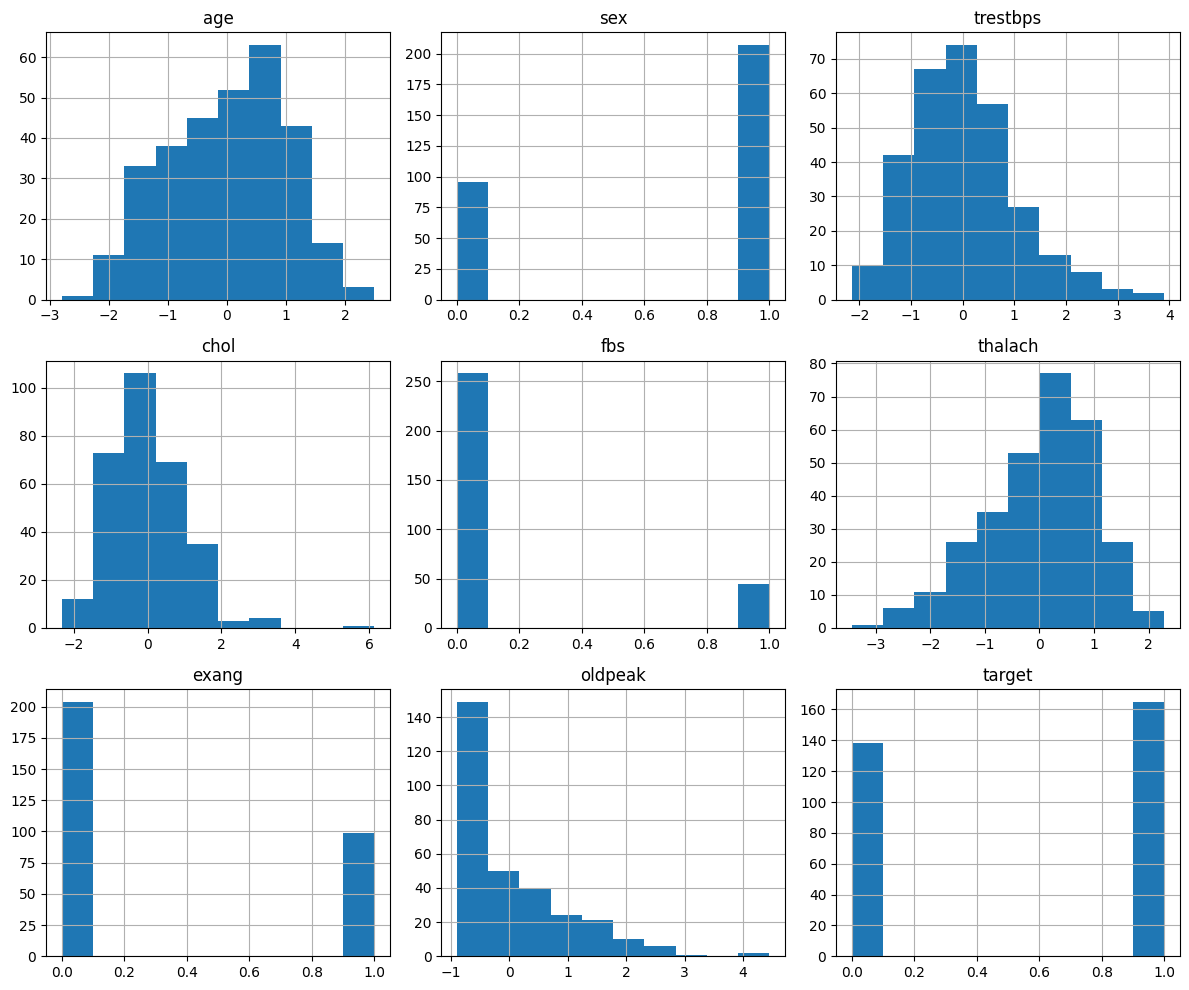

In [87]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

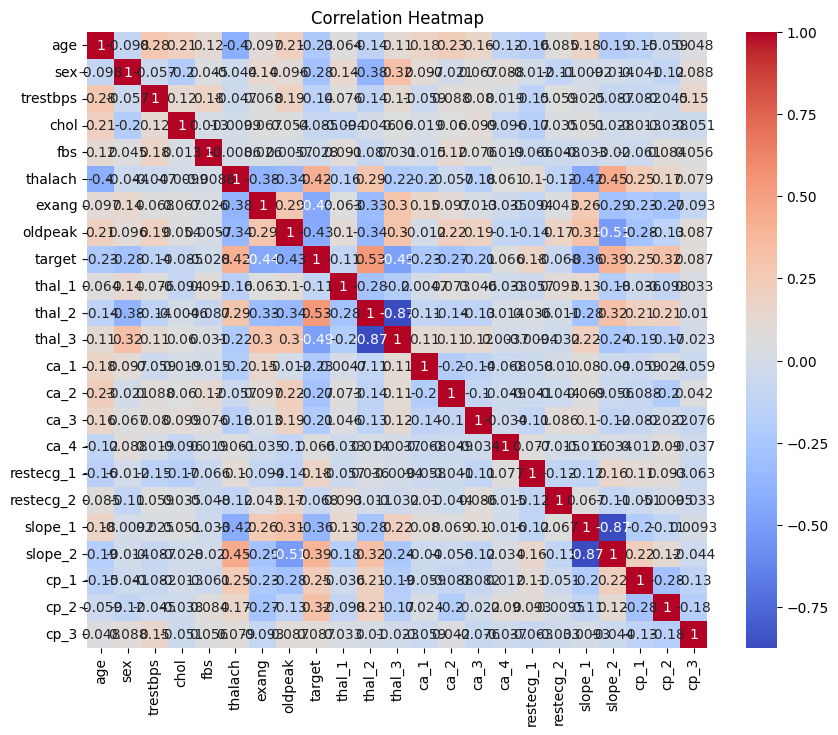

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#stroring the data
#output of this file is ---> df 
%store df

Stored 'df' (DataFrame)
